In [3]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

c:\Users\Shreya\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [7]:
import agent_class as agent

# Initialize environment and agent

In [ ]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v3')


N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [10]:
# We create an instance of the agent class. 
# At initialization, we need to provide 
# - the dimensionality of the state space, as well as 
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

# Train agent

In [ ]:

training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -298.338    |       -438.793      |      -221.831      |
|     200 |     -163.277    |       -271.759      |      -126.143      |
|     300 |     -134.582    |       -319.924      |      -117.589      |
|     400 |      -41.539    |       -124.569      |       -52.370      |
|     500 |      -20.316    |        -78.455      |       -30.871      |
|     600 |      245.438    |       -138.866      |       154.520      |
|     700 |      230.862    |         12.262      |       222.864      |
|     800 |      297.203    |         -1.432      |       216.435      |
|     900 |      223.592    |        -43.670      |       213.423      |
|    1000 |      277.391    |       -290.418      |       196.646      |
|    1100 |      233.580    |         -9.929      |

In [ ]:


training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

# Plot training stats

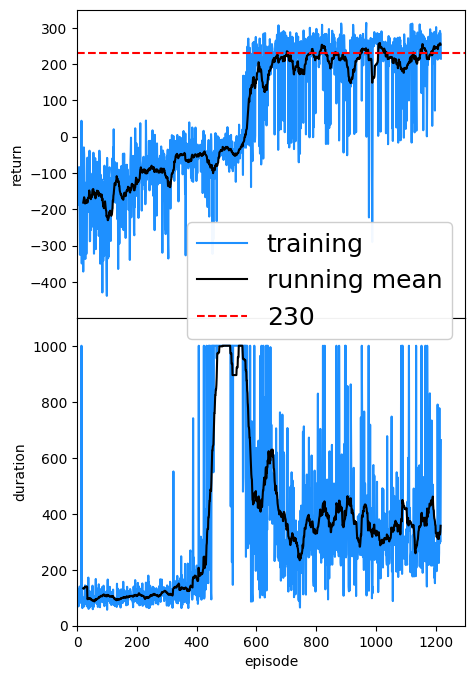

In [14]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale, 
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [15]:
# There is the issue that the game window freezes when running gym games 
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [ ]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v3',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

Run 1: duration = 518, total return = 221.758
Run 2: duration = 1000, total return = 128.583
Run 3: duration = 413, total return = 247.459
Run 4: duration = 337, total return = 234.043
Run 5: duration = 1000, total return =  95.614
Run 6: duration = 448, total return = 269.078
Run 7: duration = 312, total return = 244.428
Run 8: duration = 656, total return = 219.037
Run 9: duration = 1000, total return = 117.552
Run 10: duration = 370, total return = 278.942
Run 11: duration = 363, total return = 265.510
Run 12: duration = 348, total return = 240.962
Run 13: duration = 1000, total return = 126.540
Run 14: duration = 422, total return = 277.858
Run 15: duration = 363, total return = 252.780
Run 16: duration = 326, total return = 230.480
Run 17: duration = 445, total return = 265.484
Run 18: duration = 376, total return = 220.977
Run 19: duration = 397, total return = 229.276
Run 20: duration = 330, total return = 245.933


We also create a video file containing 20 games played by the agent

In [ ]:


import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import itertools

# Create environment and wrap it with RecordVideo
env = gym.make('LunarLander-v3', render_mode="rgb_array")
env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda x: True)  # record every episode

N_episodes = 20
result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()
    total_reward = 0

    for i in itertools.count():
        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j + 1, i + 1, total_reward))
            break

env.close()


c:\Users\Shreya\AppData\Local\Programs\Python\Python313\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at c:\Users\Shreya\Desktop\Projects\lunar-lander\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Run 1: duration = 367, total return = 242.998
Run 2: duration = 819, total return = 169.210
Run 3: duration = 347, total return = 211.681
Run 4: duration = 253, total return =  -7.886
Run 5: duration = 288, total return = 220.869
Run 6: duration = 286, total return = 300.144
Run 7: duration = 680, total return = -94.029
Run 8: duration = 338, total return = 250.424
Run 9: duration = 337, total return = 253.582
Run 10: duration = 294, total return = 219.956
Run 11: duration = 451, total return = 274.980
Run 12: duration = 276, total return = 222.520
Run 13: duration = 322, total return = 237.215
Run 14: duration = 449, total return = 272.077
Run 15: duration = 351, total return = 281.993
Run 16: duration = 680, total return = 179.980
Run 17: duration = 333, total return = 236.601
Run 18: duration = 348, total return = 269.043
Run 19: duration = 309, total return = 238.610
Run 20: duration = 364, total return = 276.915
